In [1]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
sample = pd.read_csv('final_database_2015_2016.csv', encoding = "ISO-8859-1")

In [3]:
sample.head(1)

,Unnamed: 0,Actor1 Id,Actor1 Name,Actor2 Id,Actor2 Name,Actor3 Id,Actor3 Name,Popularity,Release Date,Text,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,0,1046143.0,Caity Lotz,17271.0,Brandon Routh,59216.0,Tom Cavanagh,1.907407,2015-10-29,GASI'm america diesel is something else like y...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-10-29,0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Time to Kill,False,4.3,132.0


In [4]:
len(sample[sample['Vote Average'].isnull()])

0

In [5]:
# sample['Release Date']
def make_month(val):
    return val.split('-')[1]


def make_genres(val):
    a= str(val).split(',')
    b= [s for s in a if 'name' in s]
    c = [s.split('name')[1] for s in b ]
    d = ('_').join(c)
    return d

In [6]:
sample['genres']

0       [{'name': 'Mystery', 'id': 9648}, {'name': 'Sc...
1                           [{'name': 'Drama', 'id': 18}]
2       [{'name': 'Romance', 'id': 10749}, {'name': 'D...
3       [{'name': 'Crime', 'id': 80}, {'name': 'Drama'...
4                           [{'name': 'Drama', 'id': 18}]
5       [{'name': 'Comedy', 'id': 35}, {'name': 'Drama...
6       [{'name': 'Comedy', 'id': 35}, {'name': 'Drama...
7       [{'name': 'Drama', 'id': 18}, {'name': 'Thrill...
8       [{'name': 'Thriller', 'id': 53}, {'name': 'Rom...
9       [{'name': 'Comedy', 'id': 35}, {'name': 'Music...
10      [{'name': 'Adventure', 'id': 12}, {'name': 'Co...
11      [{'name': 'Drama', 'id': 18}, {'name': 'War', ...
12      [{'name': 'Comedy', 'id': 35}, {'name': 'Scien...
13      [{'name': 'Romance', 'id': 10749}, {'name': 'C...
14                         [{'name': 'Comedy', 'id': 35}]
15      [{'name': 'Thriller', 'id': 53}, {'name': 'Sci...
16      [{'name': 'Drama', 'id': 18}, {'name': 'Comedy...
17      [{'nam

In [7]:
sample1 = sample
sample1['genres'] = sample1['genres'].apply(make_genres)
sample1['rel_month'] = sample['release_date'].apply(make_month)

df_genre_data= sample1['genres'].str.get_dummies(sep='_')
sample1 = pd.concat([sample1, df_genre_data], axis=1)
sample1= sample1.drop(['genres'], axis = 1 )
sample1.columns

Index(['Unnamed: 0', 'Actor1 Id', 'Actor1 Name', 'Actor2 Id', 'Actor2 Name',
       'Actor3 Id', 'Actor3 Name', 'Popularity', 'Release Date', 'Text',
       'Title', 'Vote Average', 'Vote Count', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'rel_month', '': 'Action'',
       '': 'Adventure'', '': 'Animation'', '': 'Comedy'', '': 'Crime'',
       '': 'Documentary'', '': 'Drama'', '': 'Family'', '': 'Fantasy'',
       '': 'History'', '': 'Horror'', '': 'Music'', '': 'Mystery'',
       '': 'Romance'', '': 'Science Fiction'', '': 'TV Movie'',
       '': 'Thriller'', '': 'War'', '': 'Western''],
      dtype='object')

In [8]:
def correct_yr(val):
    return val.split('-')[0]

sample1['Release Date']=  sample1['Release Date'].apply(correct_yr)
sample1 = sample1[sample1['Release Date'].isin(['2015','2016'])]

In [9]:
print(len(sample1))
sample1= sample1.drop('Unnamed: 0',axis=1)
sample1.head(2)

860


,Actor1 Id,Actor1 Name,Actor2 Id,Actor2 Name,Actor3 Id,Actor3 Name,Popularity,Release Date,Text,Title,...,': 'History',': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western'
0,1046143.0,Caity Lotz,17271.0,Brandon Routh,59216.0,Tom Cavanagh,1.907407,2015,GASI'm america diesel is something else like y...,400 Days,...,0,0,0,1,0,1,0,1,0,0
1,44079.0,Charlotte Rampling,14011.0,Tom Courtenay,178614.0,Dolly Wells,1.475098,2015,DiegoI like to be able to tell you everything ...,45 Years,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sample1.to_csv("15_16_with_month_and_genre.csv", index=False)

In [11]:
# pd.read_csv("15_16_with_month_and_genre.csv")

In [12]:

# result= sample1.set_index('Title').join(sample1.set_index('Title'),lsuffix = '_genre',how='left')
# print(result.shape)
# result = result.drop('Unnamed: 0',axis=1)
# result = result.drop('Unnamed: 0_genre',axis=1)
# result.head(1)


In [13]:
len(sample1[sample1['Vote Average'].isnull()])

0

In [14]:
len(sample1[sample1['vote_average'].isnull()])

499

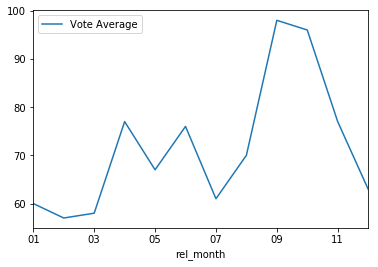

In [15]:
%matplotlib inline
sample1[['rel_month', 'Vote Average']].groupby('rel_month').count().plot()

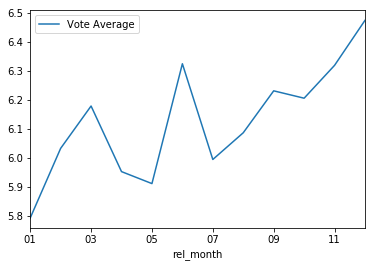

In [16]:
%matplotlib inline
sample1[['rel_month', 'Vote Average']].groupby('rel_month').mean().plot()

In [17]:
# sample_genre_categorical.head(5)
sample1['Vote Average'].mean()

6.1370930232558134

In [18]:
col_genres = [col for col in sample1.columns if  ':' in col]
col_genres
# def dummyToCategorical(x):
#     temp = ''
#     for col in col_list:
#         if x[col] == '1':
#             if len(temp) == 0:
#                 temp = col_dict[col]
#             else:
#                 temp = temp + '+' + col_dict[col]
#     return temp
# #df['combined'] = 
# df[1:].apply(lambda row: dummyToCategorical(row), axis=1)
sample_genre_categorical = pd.DataFrame({"genre": [], 'Vote Average': []})
#print(sample_genre_categorical.shape)

for col in col_genres:
    print(col + ":" + str(len(sample1[sample1[col] == 1])))
    temp = sample1[sample1[col] == 1][['Vote Average']]
   # temp = temp['']
    temp['genre'] = col
    #print(temp.shape)
    #print(temp.head(1))
    sample_genre_categorical= sample_genre_categorical.append(temp)
#print(sample_genre_categorical.shape)
print(sample_genre_categorical.groupby('genre').mean().sort(columns='Vote Average',ascending=False))
print(sample_genre_categorical.groupby('genre').count().sort(columns='Vote Average',ascending=False))

': 'Action':168
': 'Adventure':129
': 'Animation':50
': 'Comedy':269
': 'Crime':88
': 'Documentary':29
': 'Drama':417
': 'Family':47
': 'Fantasy':69
': 'History':38
': 'Horror':133
': 'Music':29
': 'Mystery':50
': 'Romance':93
': 'Science Fiction':98
': 'TV Movie':10
': 'Thriller':256
': 'War':24
': 'Western':15
                      Vote Average
genre                             
': 'Documentary'          7.148276
': 'History'              6.797368
': 'War'                  6.766667
': 'Music'                6.617241
': 'Animation'            6.494000
': 'Drama'                6.413429
': 'Romance'              6.336559
': 'Family'               6.321277
': 'Adventure'            6.296899
': 'Western'              6.246667
': 'Comedy'               6.118587
': 'Fantasy'              6.105797
': 'Crime'                6.098864
': 'Mystery'              6.046000
': 'TV Movie'             5.980000
': 'Action'               5.944048
': 'Thriller'             5.832422
': 'Science Fiction' 

//anaconda/envs/pynew/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
//anaconda/envs/pynew/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [74]:
yo = pd.DataFrame(columns=['wt','gt'])
a_dict   = { 'wt':[2], 'gt':['green']}
new_df = pd.DataFrame(a_dict)
yo= yo.append(new_df)
yo

,gt,wt
0,green,2.0


In [107]:
#use z test for genres with movie count >30 

import statsmodels
import math
# http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest

wc_df = pd.DataFrame(columns=['wt','color','genre'])

for col in col_genres:
    print('genre: '+col.split(" ")[1])
    for alternative in ['larger','smaller']:
        print('alternative: '+ alternative)
        weight = statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative)[0]
        pval = statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative)[1]
        if pval < 0.05:
            #Append only if significant
            if weight < 0:                
                color = '#ff0000'
            else:
                color = '#00ff00'
                
            a_dict   = { 'genre': [col.split(" ")[1]], 'wt':[math.fabs(weight)], 'color':[color],}
            new_df = pd.DataFrame(a_dict)
            wc_df= wc_df.append(new_df)

        print(statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative))
        
    print("_")

genre: 'Action'
alternative: larger
(-3.0970591963093099, 0.99902274580240658)
alternative: smaller
(-3.0970591963093099, 0.0009772541975934519)
_
genre: 'Adventure'
alternative: larger
(1.9587526977808538, 0.025070877823338611)
alternative: smaller
(1.9587526977808538, 0.97492912217666139)
_
genre: 'Animation'
alternative: larger
(2.7783346542992811, 0.0027319156570295993)
alternative: smaller
(2.7783346542992811, 0.99726808434297043)
_
genre: 'Comedy'
alternative: larger
(-0.57933906737805052, 0.71881979517348715)
alternative: smaller
(-0.57933906737805052, 0.28118020482651279)
_
genre: 'Crime'
alternative: larger
(-0.52714617738913627, 0.70095395919828629)
alternative: smaller
(-0.52714617738913627, 0.29904604080171371)
_
genre: 'Documentary'
alternative: larger
(6.1289742537972494, 4.4223718001430078e-10)
alternative: smaller
(6.1289742537972494, 0.99999999955776286)
_
genre: 'Drama'
alternative: larger
(6.8939184500852981, 2.7138073259221382e-12)
alternative: smaller
(6.8939184500

In [108]:
wc_df

,color,genre,wt
0,#ff0000,'Action',3.097059
0,#00ff00,'Adventure',1.958753
0,#00ff00,'Animation',2.778335
0,#00ff00,'Documentary',6.128974
0,#00ff00,'Drama',6.893918
0,#00ff00,'History',4.546208
0,#ff0000,'Horror',9.011205
0,#00ff00,'Music',2.854570
0,#00ff00,'Romance',2.086419
0,#ff0000,'Science,3.674976


In [109]:
wc_df.to_csv("word_cloud_genres.csv", index=False)

In [106]:
%matplotlib inline
import wordcloud
text = wc_df['genre']
# wordcloud.WordCloud(wc_df)
wordcloud.WordCloud.generate_from_text(text = text)


TypeError: generate_from_text() missing 1 required positional argument: 'self'

In [19]:
# use z test for genres with movie count <30 
from scipy import stats
for col in col_genres:
    print(col)
    print(stats.ttest_ind(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average']))
    print("-")


': 'Action'
Ttest_indResult(statistic=-3.0970591963093099, pvalue=0.0019815125829350912)
-
': 'Adventure'
Ttest_indResult(statistic=1.9587526977808538, pvalue=0.050279846375634464)
-
': 'Animation'
Ttest_indResult(statistic=2.7783346542992806, pvalue=0.0055146123007675761)
-
': 'Comedy'
Ttest_indResult(statistic=-0.57933906737805052, pvalue=0.56242533079841106)
-
': 'Crime'
Ttest_indResult(statistic=-0.52714617738913627, pvalue=0.59815025579524117)
-
': 'Documentary'
Ttest_indResult(statistic=6.1289742537972494, pvalue=1.0615655592214185e-09)
-
': 'Drama'
Ttest_indResult(statistic=6.8939184500852981, pvalue=7.2403062319992579e-12)
-
': 'Family'
Ttest_indResult(statistic=1.3461427589179713, pvalue=0.17840827641617205)
-
': 'Fantasy'
Ttest_indResult(statistic=-0.3988888951096996, pvalue=0.69001744409721)
-
': 'History'
Ttest_indResult(statistic=4.5462080179890672, pvalue=5.7870866834779706e-06)
-
': 'Horror'
Ttest_indResult(statistic=-9.0112047009909393, pvalue=4.6198397340586246e-19)
-


In [20]:
sample1.columns

Index(['Actor1 Id', 'Actor1 Name', 'Actor2 Id', 'Actor2 Name', 'Actor3 Id',
       'Actor3 Name', 'Popularity', 'Release Date', 'Text', 'Title',
       'Vote Average', 'Vote Count', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'rel_month', '': 'Action'',
       '': 'Adventure'', '': 'Animation'', '': 'Comedy'', '': 'Crime'',
       '': 'Documentary'', '': 'Drama'', '': 'Family'', '': 'Fantasy'',
       '': 'History'', '': 'Horror'', '': 'Music'', '': 'Mystery'',
       '': 'Romance'', '': 'Science Fiction'', '': 'TV Movie'',
       '': 'Thriller'', '': 'War'', '': 'Western''],
      dtype='object')

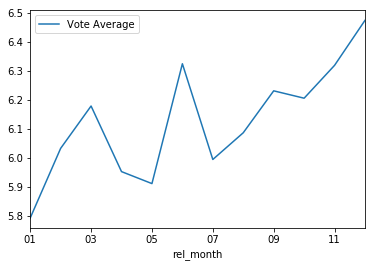

In [21]:
%matplotlib inline
sample1[['rel_month', 'Vote Average']].groupby('rel_month').mean().plot()

In [22]:
#make dummies of months
#Linear regression on vote avg using above and indep vars is 12 months

In [23]:
sample2 = sample1

In [24]:
test = pd.get_dummies(sample2['rel_month'], prefix = 'month')
sample_month = pd.concat([sample2, test], axis=1)


In [25]:
sample_month.head(2)

,Actor1 Id,Actor1 Name,Actor2 Id,Actor2 Name,Actor3 Id,Actor3 Name,Popularity,Release Date,Text,Title,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,1046143.0,Caity Lotz,17271.0,Brandon Routh,59216.0,Tom Cavanagh,1.907407,2015,GASI'm america diesel is something else like y...,400 Days,...,0,0,0,0,0,0,0,1,0,0
1,44079.0,Charlotte Rampling,14011.0,Tom Courtenay,178614.0,Dolly Wells,1.475098,2015,DiegoI like to be able to tell you everything ...,45 Years,...,0,0,0,0,0,1,0,0,0,0


In [26]:
sample_month.columns

Index(['Actor1 Id', 'Actor1 Name', 'Actor2 Id', 'Actor2 Name', 'Actor3 Id',
       'Actor3 Name', 'Popularity', 'Release Date', 'Text', 'Title',
       'Vote Average', 'Vote Count', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'rel_month', '': 'Action'',
       '': 'Adventure'', '': 'Animation'', '': 'Comedy'', '': 'Crime'',
       '': 'Documentary'', '': 'Drama'', '': 'Family'', '': 'Fantasy'',
       '': 'History'', '': 'Horror'', '': 'Music'', '': 'Mystery'',
       '': 'Romance'', '': 'Science Fiction'', '': 'TV Movie'',
       '': 'Thriller'', '': 'War'', '': 'Western'', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
  

In [27]:
# cols = [col for col in sample_month.columns if col not in ['Actor1 Id', 'Actor1 Name', 'Actor2 Id', 'Actor2 Name', 'Actor3 Id',
#        'Actor3 Name', 'Popularity', 'Release Date', 'Text', 'Title',
#        'Vote Average', 'Vote Count', 'adult', 'backdrop_path',
#        'belongs_to_collection', 'budget', 'homepage', 'id', 'imdb_id',
#        'original_language', 'original_title', 'overview', 'poster_path',
#        'production_companies', 'production_countries', 'release_date','vote_average','vote_count','rel_month',
#        'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video']]

cols = [col for col in sample_month.columns if col  in ['month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12']]
X =  sample_month[cols]
Y = sample_month['Vote Average'].apply(round)
print(X.shape, Y.shape)

(860, 12) (860,)


In [28]:
X.columns

Index(['month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06',
       'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [29]:
print(X[X.isnull().any(axis=1)])


Empty DataFrame
Columns: [month_01, month_02, month_03, month_04, month_05, month_06, month_07, month_08, month_09, month_10, month_11, month_12]
Index: []


In [30]:
X.head(1)

,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
Y[Y.isnull()]

Series([], Name: Vote Average, dtype: int64)

In [32]:
# import sklearn.datasets as datasets
# X, y = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)
# print(X.shape, y.shape)

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
    

                            OLS Regression Results                            
Dep. Variable:           Vote Average   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.527
Date:                Sun, 30 Apr 2017   Prob (F-statistic):            0.00386
Time:                        18:13:45   Log-Likelihood:                -1175.4
No. Observations:                 860   AIC:                             2375.
Df Residuals:                     848   BIC:                             2432.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month_01       5.8167      0.123     47.138      0.0

In [34]:
from scipy import stats
stats.ttest_ind(sample_month[sample_month['rel_month']=='12']['Vote Average'],sample_month[sample_month['rel_month']!='12']['Vote Average'])

Ttest_indResult(statistic=3.0784785171430591, pvalue=0.0021467984713397959)

In [35]:
# sample_month[sample_month['rel_month']=='12']

In [36]:
pd.unique(sample_month['rel_month'])

array(['10', '08', '11', '03', '12', '05', '09', '06', '02', '07', '04',
       '01'], dtype=object)

In [37]:
from scipy import stats
for i in pd.unique(sample_month['rel_month']):
    print(i)
    print(stats.ttest_ind(sample_month[sample_month['rel_month']==i]['Vote Average'],sample_month[sample_month['rel_month']!=i]['Vote Average']))
    print("_")

10
Ttest_indResult(statistic=0.79123620214056756, pvalue=0.42902483611604991)
_
08
Ttest_indResult(statistic=-0.4797925380773651, pvalue=0.63149719997901488)
_
11
Ttest_indResult(statistic=1.8490384130861037, pvalue=0.064796083914487698)
_
03
Ttest_indResult(statistic=0.36633150972139983, pvalue=0.71420803180006032)
_
12
Ttest_indResult(statistic=3.0784785171430591, pvalue=0.0021467984713397959)
_
05
Ttest_indResult(statistic=-2.1170552734737047, pvalue=0.03454238018214778)
_
09
Ttest_indResult(statistic=1.0946501105737469, pvalue=0.27397714874731904)
_
06
Ttest_indResult(statistic=1.8915513849739702, pvalue=0.05888733745380343)
_
02
Ttest_indResult(statistic=-0.89234455707652482, pvalue=0.37245847036106094)
_
07
Ttest_indResult(statistic=-1.2671923108645267, pvalue=0.20543036758170732)
_
04
Ttest_indResult(statistic=-1.8638870562389351, pvalue=0.062678938787023727)
_
01
Ttest_indResult(statistic=-3.0539085968270556, pvalue=0.0023285699673338493)
_


In [113]:

# import statsmodels
# import math
# # http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest

# wc_df_month = pd.DataFrame(columns=['wt','color','genre'])

# for col in col_genres:
#     print('genre: '+col.split(" ")[1])
#     for alternative in ['larger','smaller']:
#         print('alternative: '+ alternative)
#         weight = statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative)[0]
#         pval = statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative)[1]
#         if pval < 0.05:
#             #Append only if significant
#             if weight < 0:                
#                 color = '#ff0000'
#             else:
#                 color = '#00ff00'
                
#             a_dict   = { 'genre': [col.split(" ")[1]], 'wt':[math.fabs(weight)], 'color':[color],}
#             new_df = pd.DataFrame(a_dict)
#             wc_df= wc_df.append(new_df)

#         print(statsmodels.stats.weightstats.ztest(sample_genre_categorical[sample_genre_categorical['genre']==col]['Vote Average'],sample_genre_categorical[sample_genre_categorical['genre']!=col]['Vote Average'], alternative=alternative))
        
#     print("_")

from scipy import stats
import statsmodels
wc_df_month = pd.DataFrame(columns=['month','wt','color'])

# http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest

for i in pd.unique(sample_month['rel_month']):
    print('month:'+i)
    for alternative in ['larger','smaller']:
        print('alternative: '+ alternative)
        weight = statsmodels.stats.weightstats.ztest(sample_month[sample_month['rel_month']==i]['Vote Average'],sample_month[sample_month['rel_month']!=i]['Vote Average'], alternative=alternative)[0]
        pval = statsmodels.stats.weightstats.ztest(sample_month[sample_month['rel_month']==i]['Vote Average'],sample_month[sample_month['rel_month']!=i]['Vote Average'], alternative=alternative)[1]
        print(statsmodels.stats.weightstats.ztest(sample_month[sample_month['rel_month']==i]['Vote Average'],sample_month[sample_month['rel_month']!=i]['Vote Average'], alternative=alternative))
        if pval < 0.05:
            #Append only if significant
            if weight < 0:                
                color = 'ff0000'
            else:
                color = '00ff00'
                
            a_dict   = { 'month': [i], 'wt':[math.fabs(weight)], 'color':[color],}
            new_df = pd.DataFrame(a_dict)
            wc_df_month= wc_df_month.append(new_df)


    print("_")

month:10
alternative: larger
(0.79123620214056756, 0.21440308476521364)
alternative: smaller
(0.79123620214056756, 0.78559691523478636)
_
month:08
alternative: larger
(-0.4797925380773651, 0.68431254034971445)
alternative: smaller
(-0.4797925380773651, 0.31568745965028555)
_
month:11
alternative: larger
(1.8490384130861037, 0.032226133098735947)
alternative: smaller
(1.8490384130861037, 0.9677738669012641)
_
month:03
alternative: larger
(0.36633150972139983, 0.35705885997091602)
alternative: smaller
(0.36633150972139983, 0.64294114002908398)
_
month:12
alternative: larger
(3.0784785171430591, 0.0010403026513040913)
alternative: smaller
(3.0784785171430591, 0.99895969734869594)
_
month:05
alternative: larger
(-2.1170552734737047, 0.98287242149302212)
alternative: smaller
(-2.1170552734737047, 0.017127578506977905)
_
month:09
alternative: larger
(1.0946501105737469, 0.13683497652653681)
alternative: smaller
(1.0946501105737469, 0.86316502347346313)
_
month:06
alternative: larger
(1.89155

In [ ]:
genres_15_16_binned.to_csv("genre_with_nlp_results.csv")

In [114]:
wc_df_month

,color,month,wt
0,00ff00,11,1.849038
0,00ff00,12,3.078479
0,ff0000,05,2.117055
0,00ff00,06,1.891551
0,ff0000,04,1.863887
0,ff0000,01,3.053909


In [115]:
wc_df_month.to_csv("word-cloud_months.csv", index=False)

In [54]:
test.columns

Index(['Unnamed: 0', 'Popularity', 'Text', 'Title', 'Vote Average',
       'Vote Count', 'adult', 'budget', 'revenue', 'runtime',
       ...
       '': 'Horror'', '': 'Music'', '': 'Mystery'', '': 'Romance'',
       '': 'Science Fiction'', '': 'TV Movie'', '': 'Thriller'', '': 'War'',
       '': 'Western'', 'nlp_result'],
      dtype='object', length=1801)